In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

## Global

In [82]:
global_df = pd.read_csv('output/replication_time_new/cor_global_only.txt', sep='\t')

In [83]:
global_df['-logP'] = -np.log10(global_df['pvalue'])

# Set significant threshold in -log scale
global_thres = -np.log10(0.01 / global_df.shape[0])

In [84]:
global_df['group'] = 'sig'
global_df.loc[(global_df['-logP'] < global_thres), 'group'] = 'ns'

# Sort dataframe by -logP and reset index
global_df.sort_values(by='-logP', ascending=False, inplace=True)
global_df.reset_index(inplace=True)

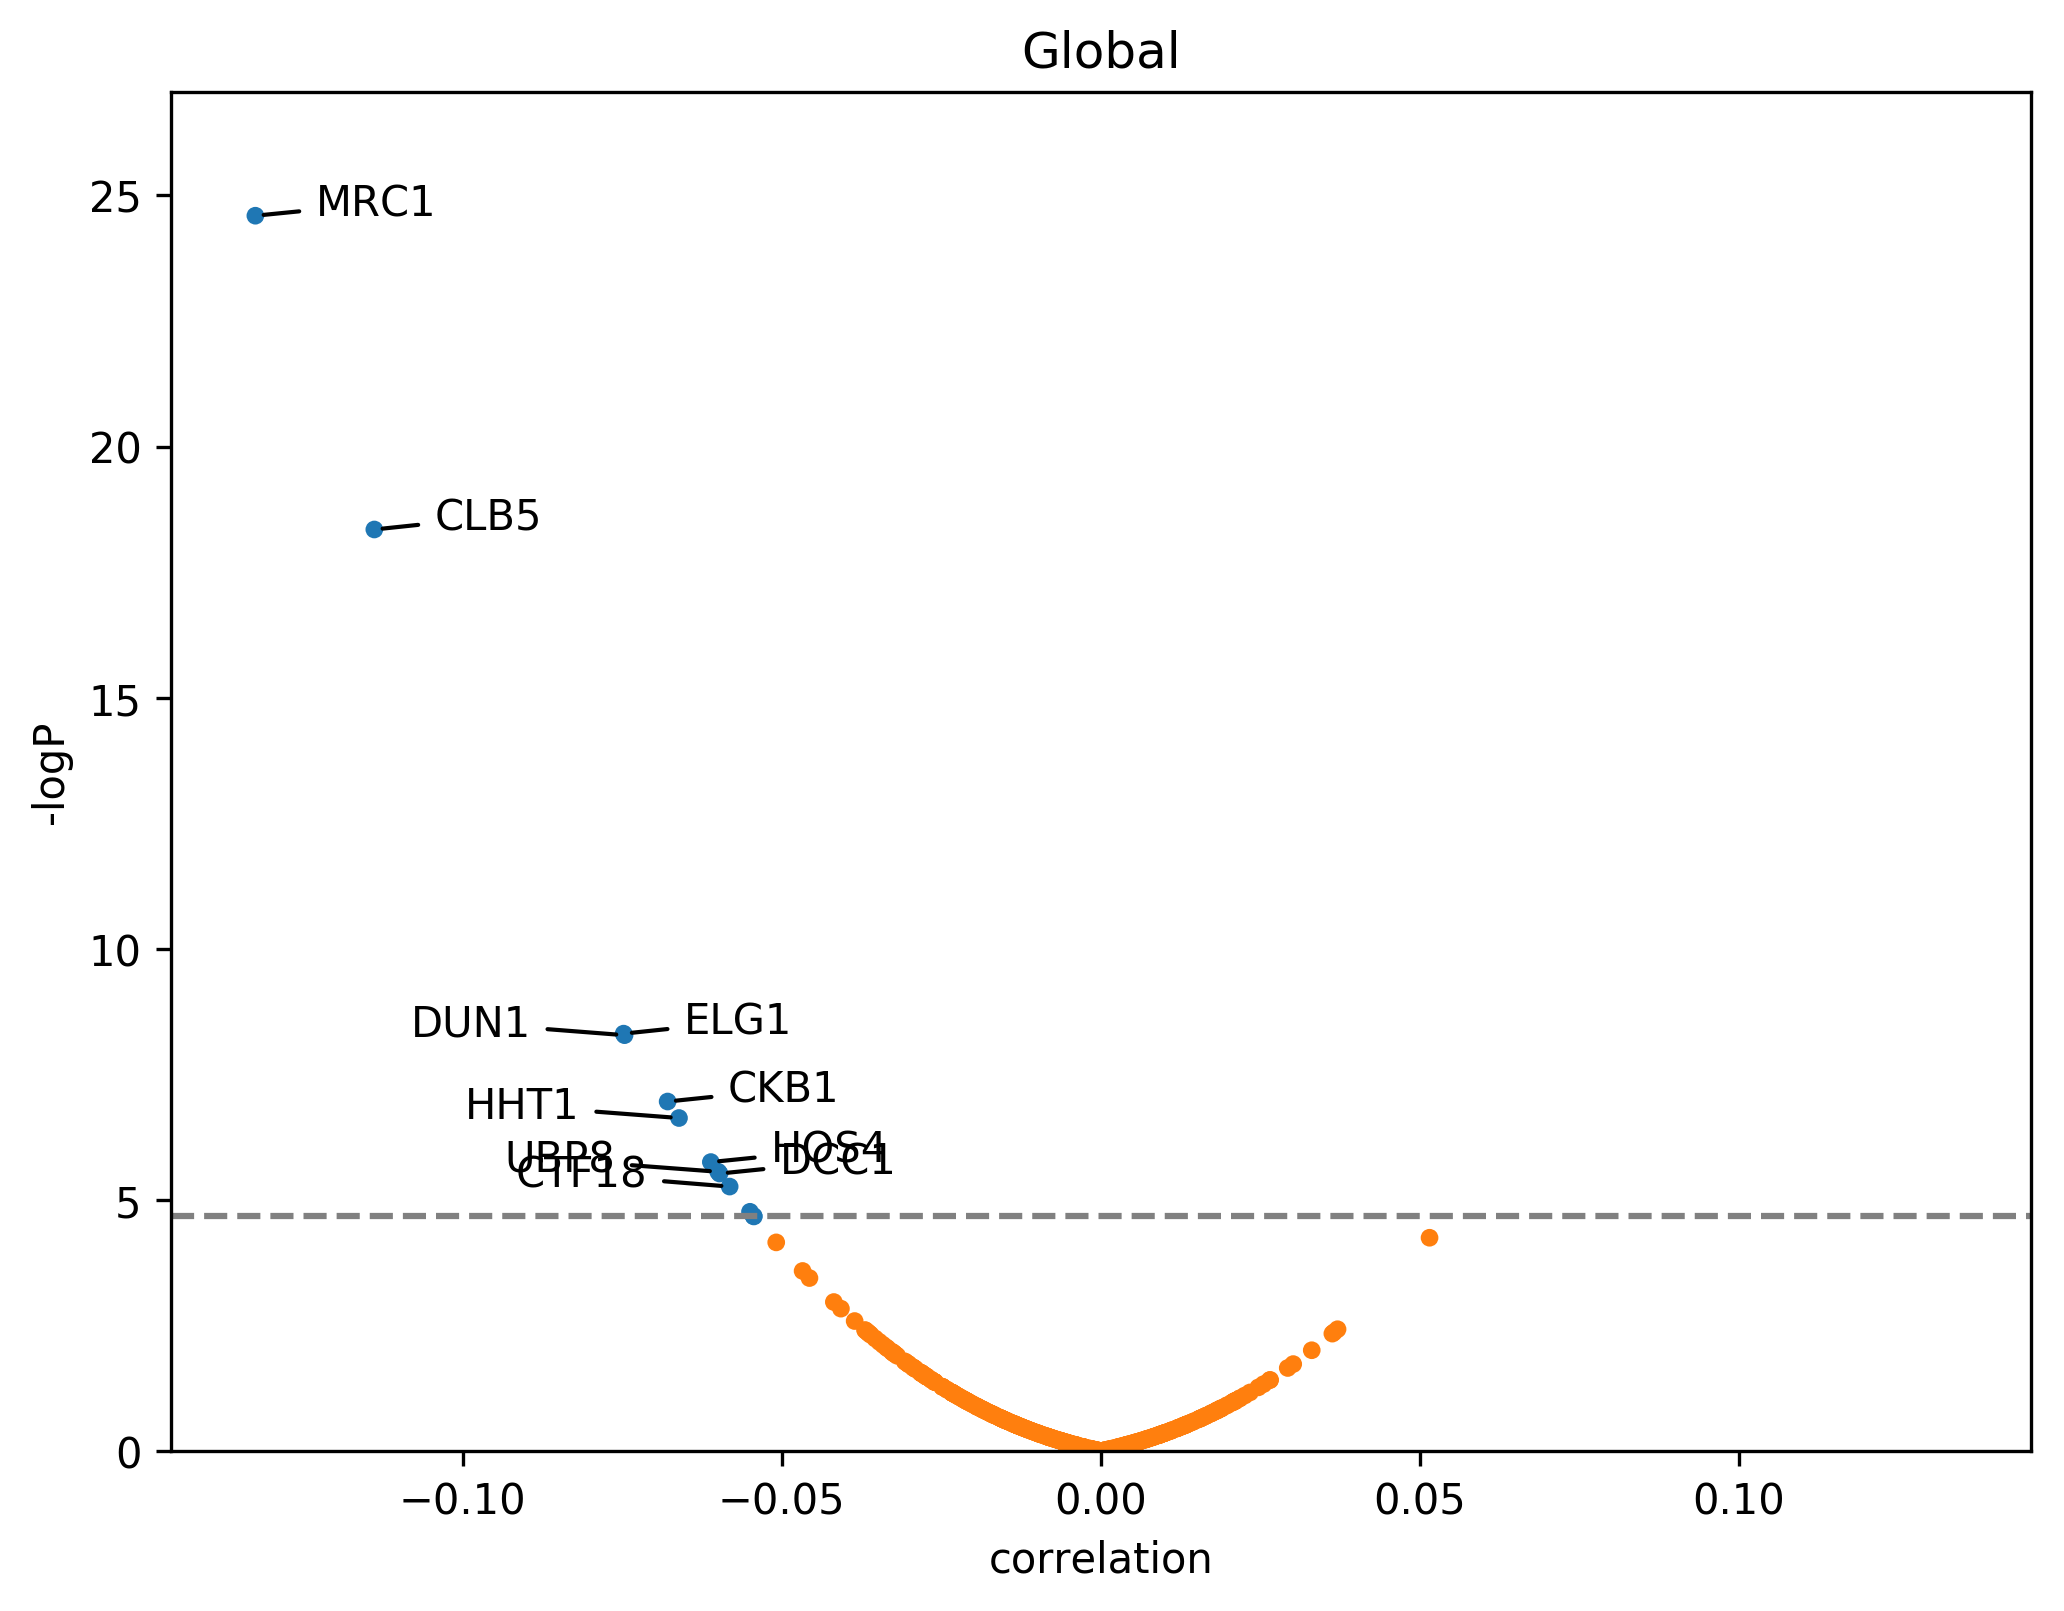

In [111]:
fig = plt.figure(figsize=(8, 6), dpi=300)
ax = sns.scatterplot(x='correlation', y='-logP', hue="group", data=global_df, size=0.001, linewidth=0)
plt.title('Global')

xscale = global_df['correlation'].abs().max() * 1.1
yscale = global_df['-logP'].max() * 1.1
plt.xlim(-xscale, xscale)
plt.ylim(0, yscale)
ax.legend_.remove()

# Horizontal line for significant threshold
plt.axhline(global_thres, ls='--', c='gray')

for i, row in global_df.head(10).iterrows():
    if row['group'] == 'sig':
        if i < 2 or i % 2 == 0:
            ax.annotate(row['gene'], (row['correlation'], row['-logP']), (row['correlation'] + xscale*0.065, row['-logP'] + xscale*0.006),
                        arrowprops=dict(facecolor='black', arrowstyle='-'))
        else:
            ax.annotate(row['gene'], (row['correlation'], row['-logP']), (row['correlation'] - xscale*0.23, row['-logP'] - xscale*0.006),
                        arrowprops=dict(facecolor='black', arrowstyle='-'))

## Local

In [68]:
local_df = pd.read_csv('output/replication_time_new/cor_local_only.txt', sep='\t')

In [69]:
local_df['-logP'] = -np.log10(local_df['pvalue'])

# Set significant threshold in -log scale
local_thres = -np.log10(0.01 / local_df.shape[0])

In [70]:
local_df['group'] = 'sig'
local_df.loc[(local_df['-logP'] < local_thres), 'group'] = 'ns'

# Sort dataframe by -logP and reset index
local_df.sort_values(by='-logP', ascending=False, inplace=True)
local_df.reset_index(inplace=True)

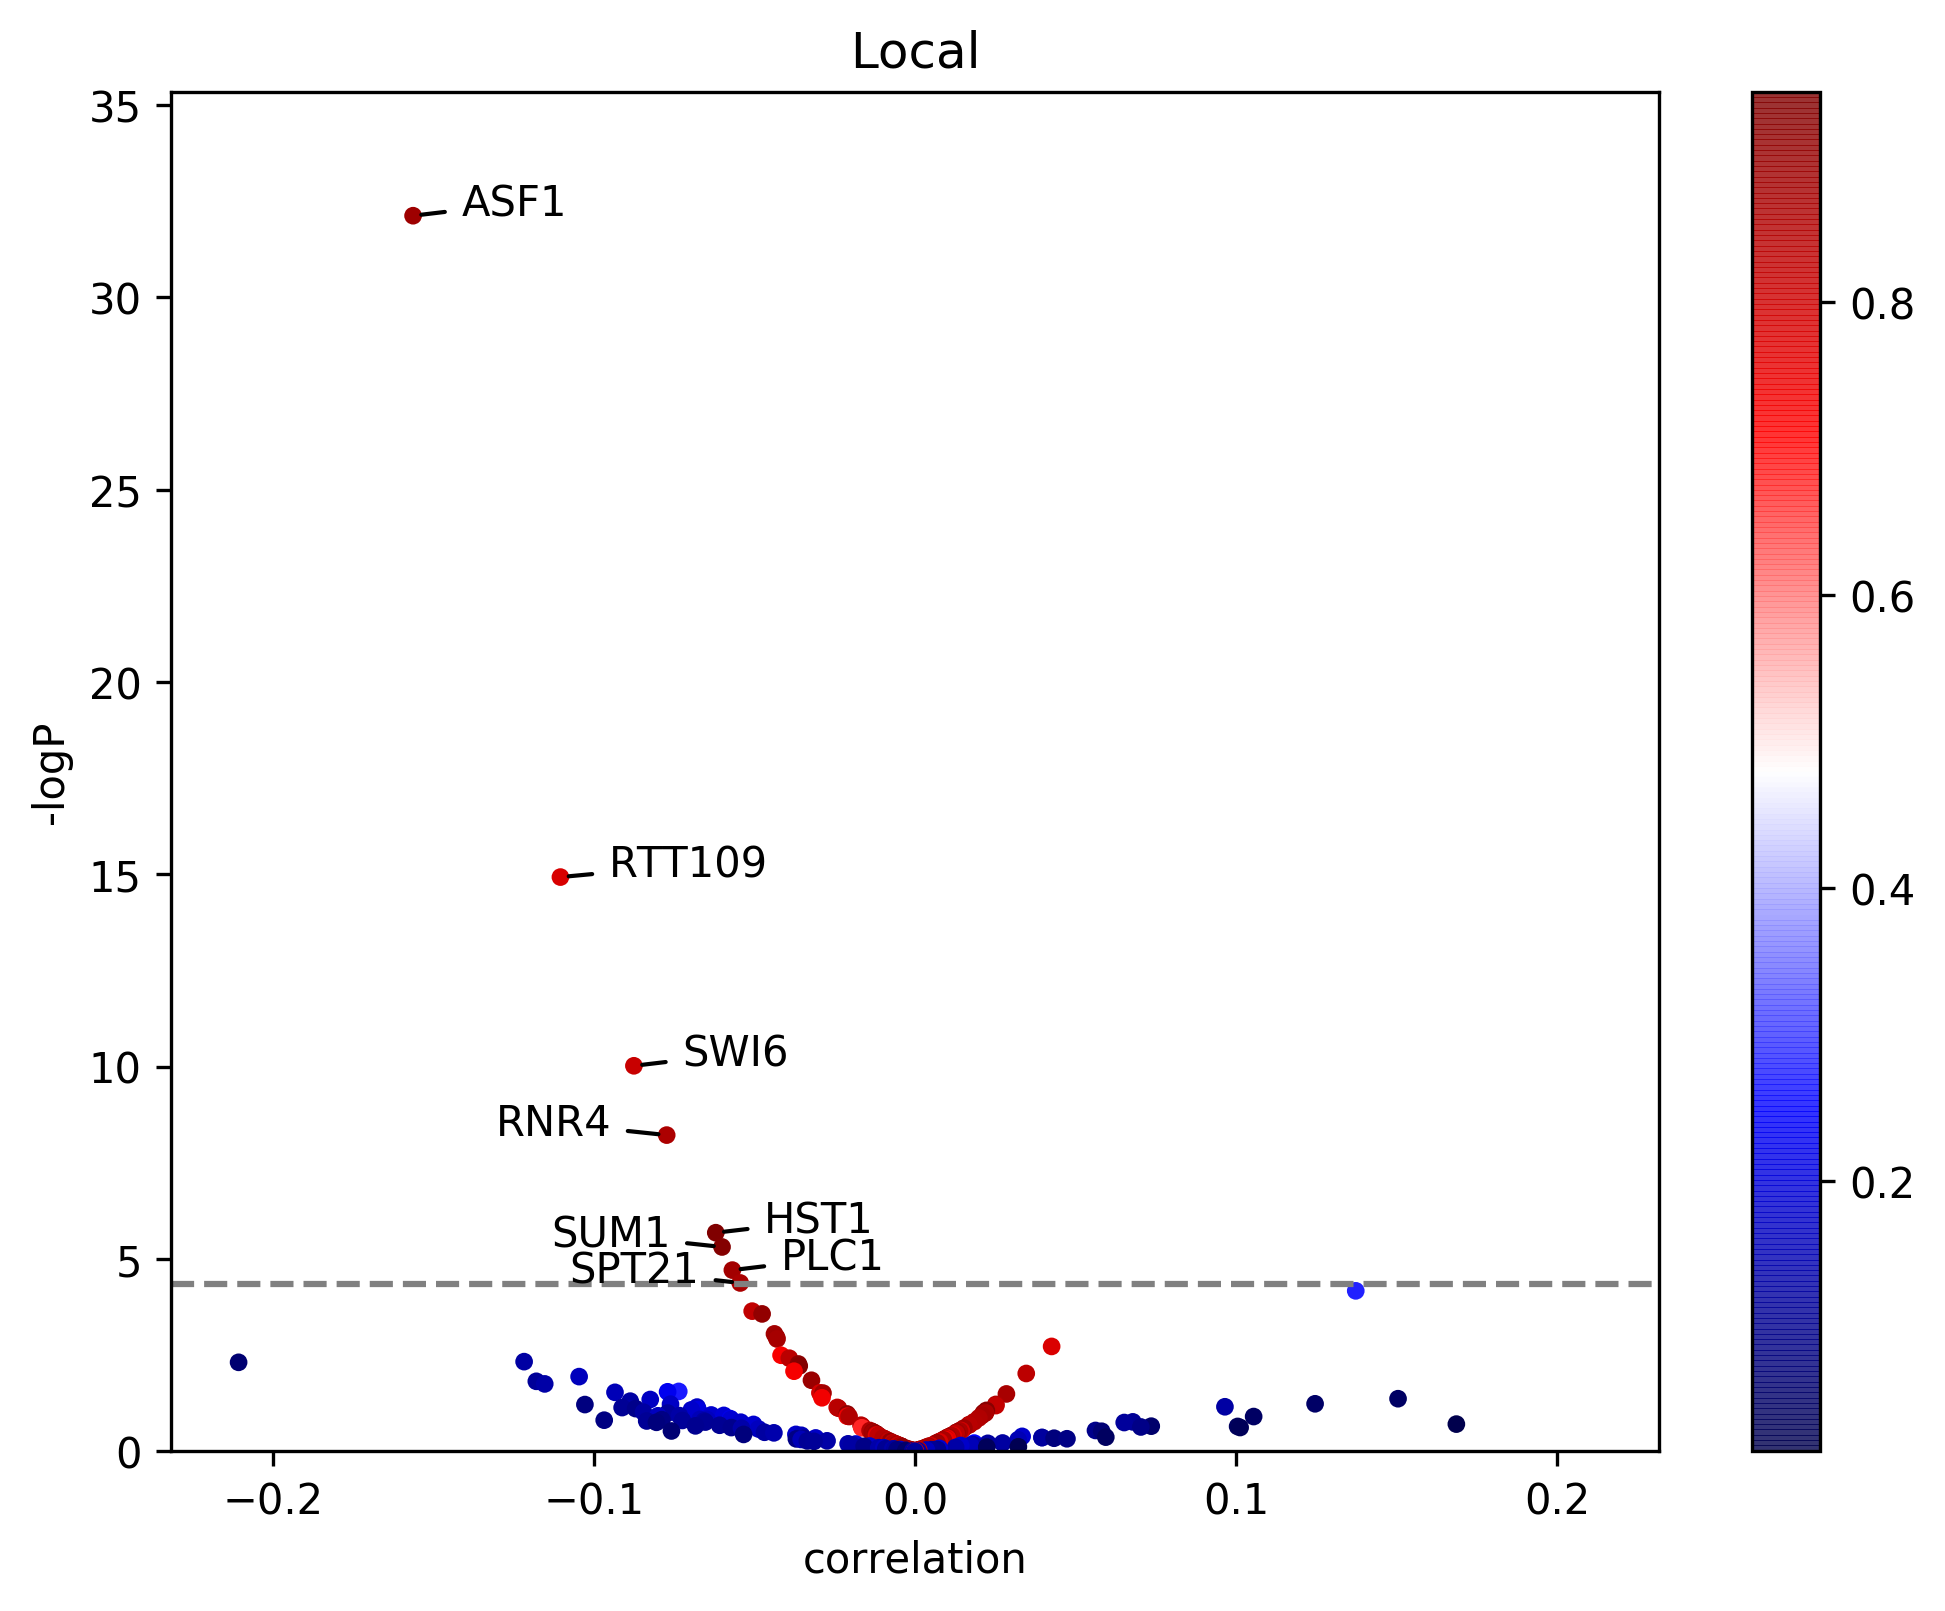

In [108]:
fig = plt.figure(figsize=(8, 6), dpi=300)
fig = plt.scatter(local_df['correlation'], local_df['-logP'], alpha = .8, c = local_df['ratio of responsive genes'], cmap = 'seismic')
plt.clf()
plt.colorbar(fig)
ax = sns.scatterplot(x='correlation', y='-logP', hue='ratio of responsive genes', palette='seismic', data=local_df, size=0.001, linewidth=0)
plt.title('Local')

xscale = local_df['correlation'].abs().max() * 1.1
yscale = local_df['-logP'].max() * 1.1
plt.xlim(-xscale, xscale)
plt.ylim(0, yscale)
ax.legend_.remove()

# Horizontal line for significant threshold
plt.axhline(local_thres, ls='--', c='gray')

for i, row in local_df.head(10).iterrows():
    if row['group'] == 'sig':
        if i < 2 or i % 2 == 0:
            ax.annotate(row['gene'], (row['correlation'], row['-logP']), (row['correlation'] + xscale*0.065, row['-logP'] + xscale*0.006),
                        arrowprops=dict(facecolor='black', arrowstyle='-'))
        else:
            ax.annotate(row['gene'], (row['correlation'], row['-logP']), (row['correlation'] - xscale*0.23, row['-logP'] - xscale*0.006),
                        arrowprops=dict(facecolor='black', arrowstyle='-'))